In [588]:
#flight price prediction
# importing the necessaru package and creating the test and train data sets


import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import random
from pandas.plotting import scatter_matrix
%matplotlib inline 
import seaborn as sns

In [479]:
training_set = pd.read_excel("Data_Train.xlsx")
test_set = pd.read_excel("Test_set.xlsx")

In [480]:
training_set.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [481]:
dataset=training_set.copy()

In [482]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>0]

In [483]:
features_with_na

['Route', 'Total_Stops']

In [484]:
## 2- step print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')

Route 0.0001  % missing values
Total_Stops 0.0001  % missing values


In [485]:
## 2- step print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().sum()),  ' % missing values')

Route 1  % missing values
Total_Stops 1  % missing values


In [486]:
dataset.shape

(10683, 11)

In [487]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [488]:
dataset.dropna(how='any',inplace=True)

In [489]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [490]:
dataset.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [491]:
#Cleaning the datasetArrival_Time

#converting datatime columns into proper data format

#Date_of_Journey,Dep_Time,Arrival_Time,Duration

dataset['Date_of_Journey'].head()

0    24/03/2019
1     1/05/2019
2     9/06/2019
3    12/05/2019
4    01/03/2019
Name: Date_of_Journey, dtype: object

In [492]:
dataset['journey_mon'] = pd.DatetimeIndex(dataset['Date_of_Journey']).month
dataset['journey_day'] = pd.DatetimeIndex(dataset['Date_of_Journey']).day


In [493]:
dataset['Dep_hour'] = pd.DatetimeIndex(dataset['Dep_Time']).hour
dataset['Dep_min'] = pd.DatetimeIndex(dataset['Dep_Time']).minute


In [494]:
dataset['Arr_hour'] = pd.DatetimeIndex(dataset['Arrival_Time']).hour
dataset['Arr_min'] = pd.DatetimeIndex(dataset['Arrival_Time']).minute

In [495]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
 11  journey_mon      10682 non-null  int64 
 12  journey_day      10682 non-null  int64 
 13  Dep_hour         10682 non-null  int64 
 14  Dep_min          10682 non-null  int64 
 15  Arr_hour         10682 non-null  int64 
 16  Arr_min          10682 non-null  int64 
dtypes: int64(7), object(10)
memory 

In [496]:
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_mon,journey_day,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [497]:
dataset.Duration.unique() #checking how string is recorded over here in duration columns

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [498]:
duration_split=dataset["Duration"].str.split(" ", n = 1, expand = True)


In [499]:
duration_split

,0,1
0,2h,50m
1,7h,25m
2,19h,None
3,5h,25m
4,4h,45m
...,...,...
10678,2h,30m
10679,2h,35m
10680,3h,None
10681,2h,40m


In [500]:
duration_hour=duration_split[0].replace('h|m',"",regex=True)
duration_hour=duration_hour.astype('int64')


In [501]:
duration_min=duration_split[1].replace('m',"",regex=True)
duration_min=duration_min.replace(np.nan,0)
duration_min=duration_min.astype('int64')

In [502]:
duration_hour

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: 0, Length: 10682, dtype: int64

In [503]:
duration_min

0        50
1        25
2         0
3        25
4        45
         ..
10678    30
10679    35
10680     0
10681    40
10682    20
Name: 1, Length: 10682, dtype: int64

In [504]:
dataset=dataset.drop(['Date_of_Journey','Dep_Time', 'Arrival_Time', 'Duration'],axis=1)

In [505]:
dataset.columns


Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'journey_mon', 'journey_day', 'Dep_hour',
       'Dep_min', 'Arr_hour', 'Arr_min'],
      dtype='object')

In [506]:
dataset['duration_hour']=duration_hour
dataset['duration_min']=duration_min

In [507]:
dataset.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'journey_mon', 'journey_day', 'Dep_hour',
       'Dep_min', 'Arr_hour', 'Arr_min', 'duration_hour', 'duration_min'],
      dtype='object')

In [508]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Total_Stops      10682 non-null  object
 5   Additional_Info  10682 non-null  object
 6   Price            10682 non-null  int64 
 7   journey_mon      10682 non-null  int64 
 8   journey_day      10682 non-null  int64 
 9   Dep_hour         10682 non-null  int64 
 10  Dep_min          10682 non-null  int64 
 11  Arr_hour         10682 non-null  int64 
 12  Arr_min          10682 non-null  int64 
 13  duration_hour    10682 non-null  int64 
 14  duration_min     10682 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 1.3+ MB


In [509]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  9


,Price,journey_mon,journey_day,Dep_hour,Dep_min,Arr_hour,Arr_min,duration_hour,duration_min
0,3897,3,24,22,20,1,10,2,50
1,7662,1,5,5,50,13,15,7,25
2,13882,9,6,9,25,4,25,19,0
3,6218,12,5,18,5,23,30,5,25
4,13302,1,3,16,50,21,35,4,45


In [510]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<50]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 8


In [511]:
discrete_feature

['journey_mon',
 'journey_day',
 'Dep_hour',
 'Dep_min',
 'Arr_hour',
 'Arr_min',
 'duration_hour',
 'duration_min']

In [512]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 1


In [513]:
continuous_feature

['Price']

In [514]:
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtypes=='O']
categorical_features

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [515]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is Airline and number of categories are 12
The feature is Source and number of categories are 5
The feature is Destination and number of categories are 6
The feature is Route and number of categories are 128
The feature is Total_Stops and number of categories are 5
The feature is Additional_Info and number of categories are 10


In [516]:
dataset[categorical_features].head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [517]:
dataset['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [518]:
dataset['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [519]:
dataset['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [520]:
dataset.loc[dataset['Additional_Info']=='No Info']

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_mon,journey_day,Dep_hour,Dep_min,Arr_hour,Arr_min,duration_hour,duration_min
795,IndiGo,Banglore,New Delhi,BLR → HYD → DEL,1 stop,No Info,8153,1,3,16,55,21,50,4,55
2212,IndiGo,Banglore,New Delhi,BLR → HYD → DEL,1 stop,No Info,7917,1,3,16,15,20,35,4,20
9220,IndiGo,Banglore,New Delhi,BLR → HYD → DEL,1 stop,No Info,8064,1,3,5,15,10,0,4,45


In [521]:
dataset['Additional_Info']=dataset['Additional_Info'].replace('No Info','No info')

In [522]:
dataset.loc[dataset['Additional_Info']=='No info']

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_mon,journey_day,Dep_hour,Dep_min,Arr_hour,Arr_min,duration_hour,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,4,27,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,4,27,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,11,30,14,10,2,40


In [523]:
dataset1=test_set.copy()
dataset1.shape,dataset1.isnull().sum()

((2671, 10), Airline            0
 Date_of_Journey    0
 Source             0
 Destination        0
 Route              0
 Dep_Time           0
 Arrival_Time       0
 Duration           0
 Total_Stops        0
 Additional_Info    0
 dtype: int64)

In [524]:
features_with_na=[features for features in dataset1.columns if dataset1[features].isnull().sum()>0]

In [525]:
features_with_na

[]

In [526]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [527]:
dataset1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [528]:
dataset1['journey_mon'] = pd.DatetimeIndex(dataset1['Date_of_Journey']).month
dataset1['journey_day'] = pd.DatetimeIndex(dataset1['Date_of_Journey']).day

In [529]:
dataset1['Dep_hour'] = pd.DatetimeIndex(dataset1['Dep_Time']).hour
dataset1['Dep_min'] = pd.DatetimeIndex(dataset1['Dep_Time']).minute

In [530]:
dataset1['Arr_hour'] = pd.DatetimeIndex(dataset1['Arrival_Time']).hour
dataset1['Arr_min'] = pd.DatetimeIndex(dataset1['Arrival_Time']).minute

In [531]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
 10  journey_mon      2671 non-null   int64 
 11  journey_day      2671 non-null   int64 
 12  Dep_hour         2671 non-null   int64 
 13  Dep_min          2671 non-null   int64 
 14  Arr_hour         2671 non-null   int64 
 15  Arr_min          2671 non-null   int64 
dtypes: int64(6), object(10)
memory usage: 334.0+ KB


In [532]:
dataset1.Duration.unique()

array(['10h 55m', '4h', '23h 45m', '13h', '2h 50m', '18h 20m', '15h 5m',
       '5h 15m', '2h 45m', '6h 5m', '28h 55m', '9h 20m', '10h 15m',
       '4h 40m', '17h 20m', '10h 50m', '9h 15m', '12h 15m', '9h 10m',
       '14h 50m', '14h 5m', '11h 35m', '13h 30m', '12h 25m', '2h 30m',
       '25h 30m', '19h 25m', '7h', '11h 40m', '7h 5m', '3h', '1h 25m',
       '2h 40m', '17h 5m', '10h 40m', '12h 30m', '1h 30m', '23h 40m',
       '2h 20m', '23h 35m', '27h 40m', '28h 20m', '5h 45m', '26h 25m',
       '5h 40m', '2h 15m', '2h 55m', '7h 30m', '5h 20m', '25h 50m',
       '13h 15m', '26h 20m', '5h 25m', '8h 45m', '7h 20m', '21h 10m',
       '16h', '7h 50m', '16h 5m', '5h 55m', '13h 50m', '11h 55m',
       '13h 20m', '18h 10m', '28h 10m', '5h', '23h 15m', '1h 15m',
       '1h 20m', '13h 25m', '6h 15m', '10h 10m', '4h 35m', '11h',
       '12h 20m', '15h 10m', '19h', '13h 45m', '9h 50m', '2h 35m',
       '7h 15m', '23h', '10h 25m', '5h 5m', '22h 45m', '8h 40m',
       '11h 30m', '15h 40m', '7h 55m'

In [533]:
duration_split1=dataset1["Duration"].str.split(" ", n = 1, expand = True)

In [534]:
duration_split1


,0,1
0,10h,55m
1,4h,None
2,23h,45m
3,13h,None
4,2h,50m
...,...,...
2666,23h,55m
2667,2h,35m
2668,6h,35m
2669,15h,15m


In [535]:
duration_hour=duration_split1[0].replace('h|m',"",regex=True)
duration_hour=duration_hour.astype('int64')


In [536]:
duration_hour1=duration_hour

In [537]:
duration_hour1

0       10
1        4
2       23
3       13
4        2
        ..
2666    23
2667     2
2668     6
2669    15
2670    14
Name: 0, Length: 2671, dtype: int64

In [538]:
duration_min1=duration_split[1].replace('m',"",regex=True)
duration_min1=duration_min1.replace(np.nan,0)
duration_min1=duration_min1.astype('int64')

In [539]:
duration_min1

0        50
1        25
2         0
3        25
4        45
         ..
10678    30
10679    35
10680     0
10681    40
10682    20
Name: 1, Length: 10682, dtype: int64

In [540]:
dataset1=dataset1.drop(['Date_of_Journey','Dep_Time', 'Arrival_Time', 'Duration'],axis=1)

In [541]:
dataset1['duration_hour']=duration_hour1
dataset1['duration_min']=duration_min1

In [542]:
dataset1.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'journey_mon', 'journey_day', 'Dep_hour', 'Dep_min',
       'Arr_hour', 'Arr_min', 'duration_hour', 'duration_min'],
      dtype='object')

In [543]:
# list of numerical variables
numerical_features1 = [feature for feature in dataset1.columns if dataset1[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features1))

# visualise the numerical variables
dataset1[numerical_features1].head()

Number of numerical variables:  8


,journey_mon,journey_day,Dep_hour,Dep_min,Arr_hour,Arr_min,duration_hour,duration_min
0,6,6,17,30,4,25,10,50
1,12,5,6,20,10,20,4,25
2,5,21,19,15,19,0,23,0
3,5,21,8,0,21,0,13,25
4,6,24,23,55,2,45,2,45


In [544]:
categorical_features1=[feature for feature in dataset1.columns if dataset1[feature].dtypes=='O']
categorical_features1

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [545]:
dataset1[categorical_features1].head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info


In [546]:
dataset1['Total_Stops'].unique()

array(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'],
      dtype=object)

In [547]:
dataset1['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Long layover', 'Business class',
       'Change airports'], dtype=object)

In [548]:
for feature in categorical_features1:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset1[feature].unique())))

The feature is Airline and number of categories are 11
The feature is Source and number of categories are 5
The feature is Destination and number of categories are 6
The feature is Route and number of categories are 100
The feature is Total_Stops and number of categories are 5
The feature is Additional_Info and number of categories are 6


In [549]:
data=dataset.append(dataset1)

In [550]:
data.shape

(13353, 15)

In [551]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'journey_mon', 'journey_day', 'Dep_hour',
       'Dep_min', 'Arr_hour', 'Arr_min', 'duration_hour', 'duration_min'],
      dtype='object')

In [552]:
## Always remember there way always be a chance of data leakage so we need to split the data first and then apply feature
## Engineering
x=data.iloc[:,[0,1,2,3,4,5,7,8,9,10,11,12,13,14]]
y=data['Price']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [553]:
X_train.shape,X_test.shape

((10682, 14), (2671, 14))

In [554]:
y_train.shape,y_test.shape

((10682,), (2671,))

In [555]:
categorical_features=[feature for feature in X_train.columns if X_train[feature].dtype=='O']

In [556]:
categorical_features1=[feature for feature in X_test.columns if X_test[feature].dtype=='O']

In [557]:
# From the info above it could be observed that many colmns are of object type. So, converting those categorical columns to numerical columns
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
le2 = LabelEncoder()

In [558]:
X_train.iloc[:,0]= le1.fit_transform(X_train.iloc[:,0])
X_train

C:\Users\Khowsalya\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Airline,Source,Destination,Route,Total_Stops,Additional_Info,journey_mon,journey_day,Dep_hour,Dep_min,Arr_hour,Arr_min,duration_hour,duration_min
3277,4,Mumbai,Hyderabad,BOM → HYD,non-stop,In-flight meal not included,9,3,19,40,21,10,1,30
1902,4,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,3,6,22,50,12,35,13,30
1118,10,Kolkata,Banglore,CCU → DEL → BLR,1 stop,No info,5,21,7,10,9,5,25,55
6690,4,Kolkata,Banglore,CCU → BOM → BLR,1 stop,No info,9,5,16,30,4,40,12,10
561,3,Kolkata,Banglore,CCU → BLR,non-stop,No info,12,4,20,20,22,55,2,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2441,4,Banglore,Delhi,BLR → DEL,non-stop,In-flight meal not included,6,15,7,10,10,10,3,30
3264,4,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,3,3,8,0,4,25,20,25
9846,6,Delhi,Cochin,DEL → HYD → MAA → COK,2 stops,No info,3,3,13,5,21,20,8,15
117,3,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,4,15,20,25,1,30,5,10


In [559]:
X_train.iloc[:,1]= le1.fit_transform(X_train.iloc[:,1])
X_train

C:\Users\Khowsalya\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Airline,Source,Destination,Route,Total_Stops,Additional_Info,journey_mon,journey_day,Dep_hour,Dep_min,Arr_hour,Arr_min,duration_hour,duration_min
3277,4,4,Hyderabad,BOM → HYD,non-stop,In-flight meal not included,9,3,19,40,21,10,1,30
1902,4,2,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,3,6,22,50,12,35,13,30
1118,10,3,Banglore,CCU → DEL → BLR,1 stop,No info,5,21,7,10,9,5,25,55
6690,4,3,Banglore,CCU → BOM → BLR,1 stop,No info,9,5,16,30,4,40,12,10
561,3,3,Banglore,CCU → BLR,non-stop,No info,12,4,20,20,22,55,2,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2441,4,0,Delhi,BLR → DEL,non-stop,In-flight meal not included,6,15,7,10,10,10,3,30
3264,4,2,Cochin,DEL → BOM → COK,1 stop,No info,3,3,8,0,4,25,20,25
9846,6,2,Cochin,DEL → HYD → MAA → COK,2 stops,No info,3,3,13,5,21,20,8,15
117,3,2,Cochin,DEL → BOM → COK,1 stop,No info,4,15,20,25,1,30,5,10


In [564]:
X_train.iloc[:,2]= le1.fit_transform(X_train.iloc[:,2])
X_train

C:\Users\Khowsalya\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Airline,Source,Destination,Route,Total_Stops,Additional_Info,journey_mon,journey_day,Dep_hour,Dep_min,Arr_hour,Arr_min,duration_hour,duration_min
3277,4,4,3,48,4,In-flight meal not included,9,3,19,40,21,10,1,30
1902,4,2,1,106,0,In-flight meal not included,3,6,22,50,12,35,13,30
1118,10,3,0,75,0,No info,5,21,7,10,9,5,25,55
6690,4,3,0,68,0,No info,9,5,16,30,4,40,12,10
561,3,3,0,66,4,No info,12,4,20,20,22,55,2,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2441,4,0,2,18,4,In-flight meal not included,6,15,7,10,10,10,3,30
3264,4,2,1,106,0,No info,3,3,8,0,4,25,20,25
9846,6,2,1,114,1,No info,3,3,13,5,21,20,8,15
117,3,2,1,106,0,No info,4,15,20,25,1,30,5,10


In [565]:
X_train.iloc[:,3]= le1.fit_transform(X_train.iloc[:,3])
X_train

C:\Users\Khowsalya\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Airline,Source,Destination,Route,Total_Stops,Additional_Info,journey_mon,journey_day,Dep_hour,Dep_min,Arr_hour,Arr_min,duration_hour,duration_min
3277,4,4,3,48,4,In-flight meal not included,9,3,19,40,21,10,1,30
1902,4,2,1,106,0,In-flight meal not included,3,6,22,50,12,35,13,30
1118,10,3,0,75,0,No info,5,21,7,10,9,5,25,55
6690,4,3,0,68,0,No info,9,5,16,30,4,40,12,10
561,3,3,0,66,4,No info,12,4,20,20,22,55,2,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2441,4,0,2,18,4,In-flight meal not included,6,15,7,10,10,10,3,30
3264,4,2,1,106,0,No info,3,3,8,0,4,25,20,25
9846,6,2,1,114,1,No info,3,3,13,5,21,20,8,15
117,3,2,1,106,0,No info,4,15,20,25,1,30,5,10


In [566]:
X_train.iloc[:,4]= le1.fit_transform(X_train.iloc[:,4])
X_train

C:\Users\Khowsalya\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Airline,Source,Destination,Route,Total_Stops,Additional_Info,journey_mon,journey_day,Dep_hour,Dep_min,Arr_hour,Arr_min,duration_hour,duration_min
3277,4,4,3,48,4,In-flight meal not included,9,3,19,40,21,10,1,30
1902,4,2,1,106,0,In-flight meal not included,3,6,22,50,12,35,13,30
1118,10,3,0,75,0,No info,5,21,7,10,9,5,25,55
6690,4,3,0,68,0,No info,9,5,16,30,4,40,12,10
561,3,3,0,66,4,No info,12,4,20,20,22,55,2,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2441,4,0,2,18,4,In-flight meal not included,6,15,7,10,10,10,3,30
3264,4,2,1,106,0,No info,3,3,8,0,4,25,20,25
9846,6,2,1,114,1,No info,3,3,13,5,21,20,8,15
117,3,2,1,106,0,No info,4,15,20,25,1,30,5,10


In [568]:
X_train.iloc[:,5]= le1.fit_transform(X_train.iloc[:,5])
X_train

C:\Users\Khowsalya\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Airline,Source,Destination,Route,Total_Stops,Additional_Info,journey_mon,journey_day,Dep_hour,Dep_min,Arr_hour,Arr_min,duration_hour,duration_min
3277,4,4,3,48,4,4,9,3,19,40,21,10,1,30
1902,4,2,1,106,0,4,3,6,22,50,12,35,13,30
1118,10,3,0,75,0,6,5,21,7,10,9,5,25,55
6690,4,3,0,68,0,6,9,5,16,30,4,40,12,10
561,3,3,0,66,4,6,12,4,20,20,22,55,2,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2441,4,0,2,18,4,4,6,15,7,10,10,10,3,30
3264,4,2,1,106,0,6,3,3,8,0,4,25,20,25
9846,6,2,1,114,1,6,3,3,13,5,21,20,8,15
117,3,2,1,106,0,6,4,15,20,25,1,30,5,10


In [569]:
X_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,journey_mon,journey_day,Dep_hour,Dep_min,Arr_hour,Arr_min,duration_hour,duration_min
3277,4,4,3,48,4,4,9,3,19,40,21,10,1,30
1902,4,2,1,106,0,4,3,6,22,50,12,35,13,30
1118,10,3,0,75,0,6,5,21,7,10,9,5,25,55
6690,4,3,0,68,0,6,9,5,16,30,4,40,12,10
561,3,3,0,66,4,6,12,4,20,20,22,55,2,35


In [570]:
X_test.iloc[:,0] = le2.fit_transform(X_test.iloc[:,0])

X_test.iloc[:,1] = le2.fit_transform(X_test.iloc[:,1])

X_test.iloc[:,2] = le2.fit_transform(X_test.iloc[:,2])

X_test.iloc[:,3] = le2.fit_transform(X_test.iloc[:,3])

X_test.iloc[:,4] = le2.fit_transform(X_test.iloc[:,4])

X_test.iloc[:,5] = le2.fit_transform(X_test.iloc[:,5])
X_test

C:\Users\Khowsalya\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Airline,Source,Destination,Route,Total_Stops,Additional_Info,journey_mon,journey_day,Dep_hour,Dep_min,Arr_hour,Arr_min,duration_hour,duration_min
7986,4,2,1,72,0,4,6,6,19,45,19,0,23,15
1921,1,2,1,72,0,6,6,24,7,0,19,15,12,15
1762,6,2,1,79,0,6,3,21,9,45,22,20,12,15
3951,4,3,0,43,0,6,5,24,6,30,9,20,26,50
1652,8,4,3,34,3,5,9,5,5,45,7,15,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852,6,2,1,72,0,6,6,24,9,0,21,0,12,0
7281,3,2,1,72,0,6,3,21,4,45,21,0,16,15
7741,8,3,0,55,0,6,12,5,11,15,18,30,7,15
10251,6,2,1,79,0,6,5,15,13,5,22,30,9,25


In [571]:
X_test['Total_Stops'].unique()

array([0, 3, 1, 2])

In [572]:
X_train['Total_Stops'].unique()

array([4, 0, 1, 2, 3], dtype=int64)

In [573]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

In [574]:
X_train = sc_X.fit_transform(X_train)
X_train

array([[ 0.00846052,  1.73213963,  1.06827938, ..., -0.89794906,
        -1.0886323 ,  0.09396462],
       [ 0.00846052,  0.03425337, -0.29224048, ...,  0.61663989,
         0.32657644,  0.09396462],
       [ 2.54234563,  0.8831965 , -0.97250042, ..., -1.20086685,
         1.74178518,  1.57264775],
       ...,
       [ 0.85308889,  0.03425337, -0.29224048, ..., -0.29211348,
        -0.26309387, -0.79324525],
       [-0.41385367,  0.03425337, -0.29224048, ...,  0.3137221 ,
        -0.61689605, -1.08898188],
       [ 0.00846052,  0.8831965 , -0.97250042, ...,  0.61663989,
         1.9776533 , -1.08898188]])

In [575]:
X_test = sc_X.transform(X_test)
X_test

array([[ 0.00846052,  0.03425337, -0.29224048, ..., -1.50378464,
         1.50591706, -0.79324525],
       [-1.25848204,  0.03425337, -0.29224048, ..., -0.59503127,
         0.20864238, -0.79324525],
       [ 0.85308889,  0.03425337, -0.29224048, ..., -0.29211348,
         0.20864238, -0.79324525],
       ...,
       [ 1.69771726,  0.8831965 , -0.97250042, ...,  0.3137221 ,
        -0.38102793, -0.79324525],
       [ 0.85308889,  0.03425337, -0.29224048, ...,  0.3137221 ,
        -0.14515981, -0.201772  ],
       [ 0.00846052,  0.8831965 , -0.97250042, ...,  1.52539327,
         0.09070832, -0.201772  ]])

# Data Vizualization

In [585]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_mon,journey_day,Dep_hour,Dep_min,Arr_hour,Arr_min,duration_hour,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897.0,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662.0,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882.0,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218.0,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302.0,1,3,16,50,21,35,4,45


In [589]:
def plot_distribution(data, cols=5, width=20, height=30, hspace=0.2, wspace=0.5):
    plt.style.use('fivethirtyeight') #Use matplotlib style settings from a style specification.
    fig = plt.figure(figsize=(width,height)) #Create a new figure
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace) # customizing the subplots
    rows = math.ceil(float(dataset.shape[1]) / cols)
    #print(rows)
    #iterating over the columns and then showing the data distribution in various columns
    for i, column in enumerate(dataset.columns):
        # print('befor',i,cols)
        ax = fig.add_subplot(rows, cols, i + 1)
        # print('after',i,cols)
        # print(column)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object: # plot counts of different values if the column has a datatype object
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            #print(substrings)
            g.set(yticklabels=substrings) #Set the y-tick labels with list of strings labels.
            plt.xticks(rotation=25) #Get or set the current tick locations and labels of the x-axis.
            #plt.show()
        else:
            g = sns.distplot(dataset[column]) # Plotting if the datatype of the column is not object
            plt.xticks(rotation=25) #Get or set the current tick locations and labels of the x-axis.
            #plt.show()


C:\Users\Khowsalya\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
C:\Users\Khowsalya\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
C:\Users\Khowsalya\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behav

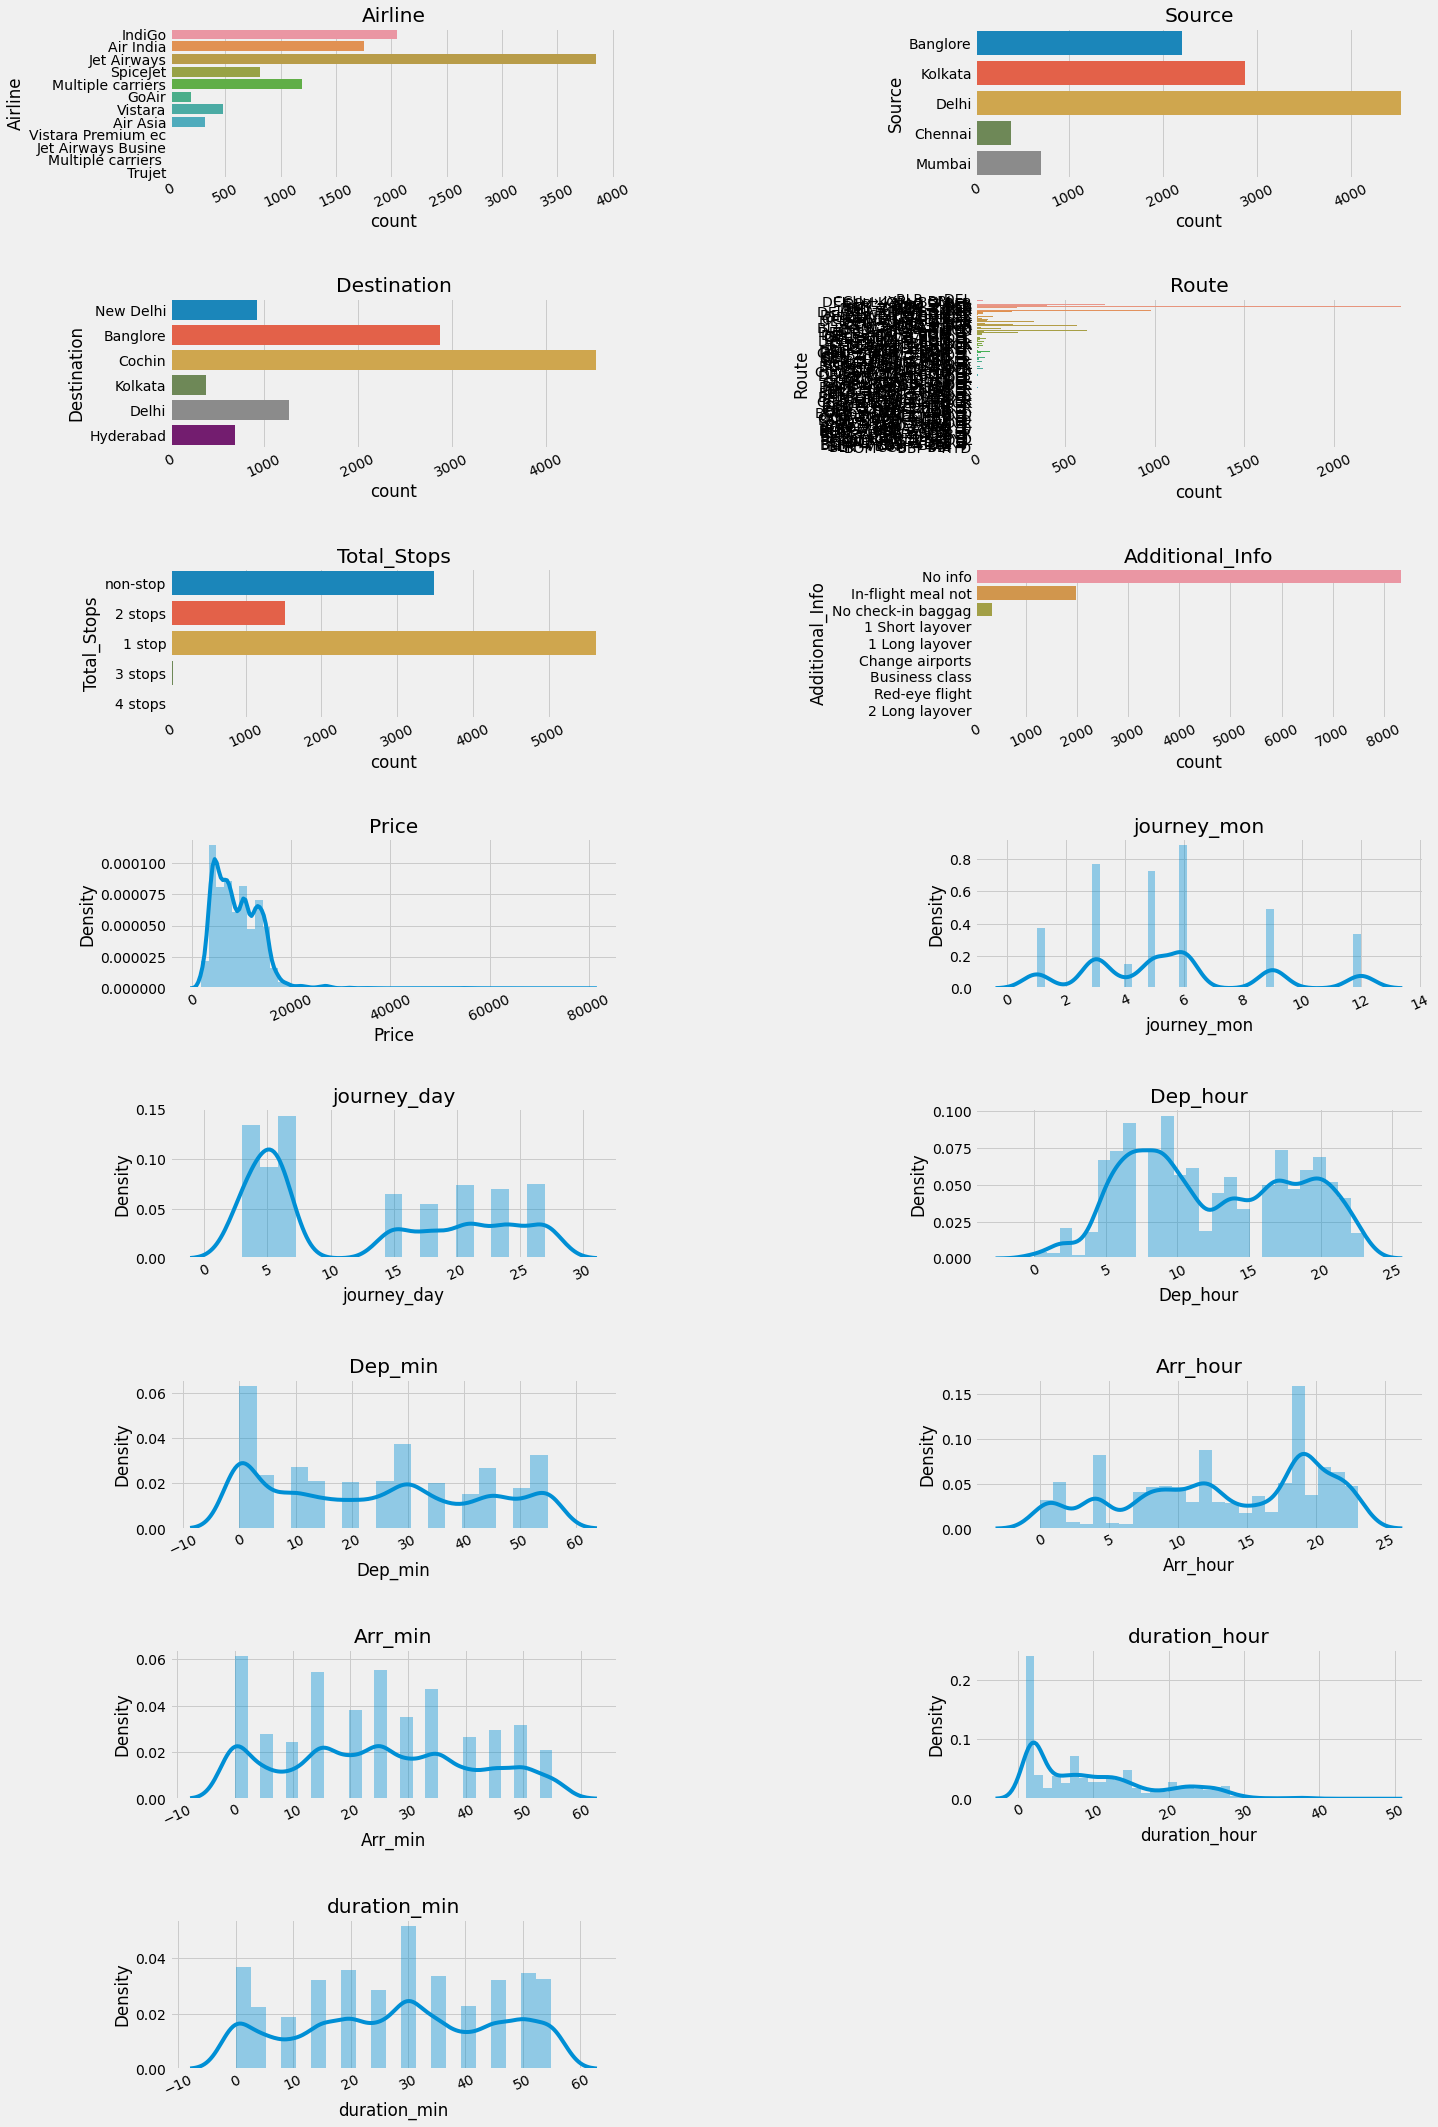

In [590]:
plot_distribution(data, cols=2, width=20, height=35, hspace=0.8, wspace=0.8)